## Objectifs

À partir des données fournies par l'analyse LA-ICP MS, plusieurs choses sont à réaliser:
   - calculer l'intensité relative des isotopes calibrants par rapport aux différents étalons et déterminer l'écart-type normalisé
   - tracer les spectres de l'intensité relative en fonction du temps
   - effectuer une régression linéaire pour établir un lien entre concentration et intensité relative
   - visualiser ces courbes de calibration avec barres d'erreur
   - afficher des images qualitatives de la concentration en isotopes pour un échantillon

## Lecture des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
etalons = ["Ge72", "Rh103", "Te126"]
calibrants = ["Cu63", "Zn64", "Pt195", "Co59", "Ni60", "Se78", "Mo98", "Cd111"]
cal_mineurs = ["Co59", "Ni60", "Se78", "Mo98", "Cd111"]
calibres = ["0", "2.5", "10", "50", "100", "300"]

Les fichiers de données se présentent sous la forme de fichier .csv. Les trois premières lignes contiennent des informations relatives à la mesure, et sont donc ignorées.

In [2]:
df = pd.read_csv("data/0ppm-cal7-1.csv",
                sep=",",
                index_col=None,
                skiprows=3
                )
df.drop(index=[168,169,170], inplace=True)
df.head()

,Time [Sec],Cr53,Co59,Ni60,Cu63,Zn64,Ge72,As75,Se78,Mo98,Rh103,Cd111,Sb121,Te126,Gd157,Pt195,Hg202,Tl205,Pb208,U238
0,1.328,0.00,0.0,0.00,887.52,0.00,0.00,0.0,0.0,0.00,24785.34,10.0,6217.86,2283.49,550.01,83.33,66.67,0.00,866.69,1383.40
1,2.646,16.67,187.5,116.67,512.51,512.51,900.02,12.5,0.0,0.00,4283.89,0.0,3417.03,1150.04,683.35,100.00,250.00,33.33,1100.04,1483.41
2,3.964,0.00,200.0,83.33,287.50,362.50,700.01,12.5,0.0,0.00,2750.23,10.0,2866.92,1633.42,666.68,0.00,183.33,0.00,1466.74,1600.09
3,5.282,16.67,200.0,116.67,325.00,325.00,1100.04,25.0,0.0,16.67,3817.11,30.0,4017.16,1133.37,683.35,100.00,133.33,66.67,766.69,1450.07
4,6.6,83.33,162.5,150.00,500.01,212.50,616.68,0.0,0.0,0.00,3733.76,10.0,3033.62,1050.03,733.35,50.00,200.00,0.00,1000.03,1450.07


La première colonne est contient l'instant où la mesure d'intensité a été prise. Les autres colonnes contiennent les intensités pour chaque élément.
On peut remarquer que certaines valeurs des étalons sont nulles, ce qui les rend inutilisables pour le calcul d'intensité relative, puisqu'on ne peut pas diviser par 0. 

Les noms des fichiers ont la même syntaxe, à savoir le calibre (la concentration d'étalon), suivit du numéro de la calibration (toujours 7 dans notre cas), puis du numéro de la mesure.
Cette syntaxe nous permet de créer une fonction qui ouvre et extrait les informations de plusieurs fichiers dans une boucle for, pour un calibre donné.

On peut alors créer une fonction qui calcule **l'intensité relative** par rapport à un étalon donné à la concentration voulue. Cette fonction réalise une moyenne sur les trois fichiers donnés par calibre et par étalon.

Cette fonction renvoie une dataframe contenant l'ensemble des intensités relatives de tous les éléments.

In [4]:
def get_relative_intensity_df(calibre, etalon):
    
    #Lecture des trois fichiers de données
    for no in ["1", "2", "3"]:
        df_temp = pd.read_csv("data/"+calibre+"ppm-cal7-"+no+".csv",
                sep=",",
                index_col=None,
                skiprows=3
                )
        # La dataframe est créée lors de la lecture du premier fichier
        if no == "1":
            df_rel = pd.DataFrame({"Time [Sec]": df_temp["Time [Sec]"]},
                         index=df.index
                         )
            df_rel[calibrants] = df_temp[calibrants].div(df_temp[etalon], axis=0)
        else:
            df_rel[calibrants] += df_temp[calibrants].div(df_temp[etalon], axis=0)
    
    #On divise par 3 pour obtenir la valeur moyenne
    df_rel[calibrants] *= 1/3
    return df_rel

In [5]:
calibre = calibres[0] # 0: 0, 1: 2,5 ppm, 2: 10 ppm, 3: 50 ppm, 4: 100 ppm, 5: 300 ppm
etalon = etalons[0] #0: germanium, 1: rhodium, 2: tellure

print("Calibre: "+calibre)
print("Étalon: "+etalon)
get_relative_intensity_df(calibre, etalon)

Calibre: 0
Étalon: Ge72


,Time [Sec],Cu63,Zn64,Pt195,Co59,Ni60,Se78,Mo98,Cd111
0,1.328,inf,NaN,NaN,NaN,NaN,NaN,NaN,inf
1,2.646,0.355314,0.366465,0.069788,0.167037,0.080918,0.000000,0.012361,0.002410
2,3.964,0.377771,0.450428,0.047195,0.186050,0.105913,0.000000,0.004220,0.049565
3,5.282,0.260876,0.289149,0.058608,0.166156,0.072785,0.000000,0.009682,0.045518
4,6.6,0.426156,0.326857,0.054726,0.245363,0.124634,0.004237,0.000000,0.025088
...,...,...,...,...,...,...,...,...,...
163,216.172,0.411382,0.360777,0.015625,0.186219,0.094455,0.000000,0.018668,0.055620
164,217.49,0.312369,0.319522,0.020513,0.181065,0.045817,0.003378,0.000000,0.040492
165,218.808,0.388080,0.363388,0.025481,0.155935,0.100021,0.004237,0.034020,0.040248
166,220.126,0.283266,0.258327,0.034068,0.164026,0.106448,0.000000,0.000000,0.021274


On remarque la présence de "inf" et "NaN" sur la première ligne.<br> Cela est dû au fait que l'étalon a une valeur d'intensité nulle pour cet index. Python interprète une division par zéro comme un infini, sauf 0/0, qui est indéterminé (Not a Number).

Pour obtenir une estimation de l'erreur sur les intensités relatives, on utilise le RSD (Relative Standard Deviation), qui est le rapport entre l'écart-type et la moyenne de la série.
$$RSD=\frac{\sigma}{\overline{I}}$$

Cette fonction renvoie une dataframe semblable à la précédente, mais avec les RSD au lieu de la moyenne :

In [6]:
def get_RSD_df(calibre, etalon):
    for no in ["1", "2", "3"]:
        df_temp = pd.read_csv("data/"+calibre+"ppm-cal7-"+no+".csv",
                sep=",",
                index_col=None,
                skiprows=3
                )
        
        # La dataframe est créé lors de la lecture du premier fichier
        if no == "1":
            df_RSD = pd.DataFrame({"Time [Sec]": df_temp["Time [Sec]"]},
                         index=df.index
                         )
            df_RSD[calibrants] = (df_temp[calibrants].div(df_temp[etalon], axis=0)
                                  - get_relative_intensity_df(calibre, etalon)[calibrants]) ** 2
        else:
            df_RSD[calibrants] += (df_temp[calibrants].div(df_temp[etalon], axis=0)
                                   - get_relative_intensity_df(calibre, etalon)[calibrants]) ** 2
            
    #On divise par 3 et on prend la racine carrée pour obtenir l'écart-type
    df_RSD[calibrants] *= 1/2
    df_RSD[calibrants] **= 1/2
    
    #On divise par la moyenne pour obtenir le RSD
    df_RSD[calibrants] =  df_RSD[calibrants].div(get_relative_intensity_df(calibre, etalon)[calibrants], axis=0)
    return df_RSD

In [7]:
calibre = calibres[0] # 0: 0, 1: 2,5 ppm, 2: 10 ppm, 3: 50 ppm, 4: 100 ppm, 5: 300 ppm
etalon = etalons[0] #0: germanium, 1: rhodium, 2: tellure

print("Calibre: "+calibre)
print("Étalon: "+etalon)
get_RSD_df(calibre, etalon).head()

Calibre: 0
Étalon: Ge72


,Time [Sec],Cu63,Zn64,Pt195,Co59,Ni60,Se78,Mo98,Cd111
0,1.328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.646,0.522079,0.512552,0.610760,0.275354,0.531505,NaN,0.975574,1.732051
2,3.964,0.435281,0.339659,1.295619,0.464243,0.825500,NaN,1.732051,1.087740
3,5.282,0.209362,0.197488,0.539029,0.095781,0.436006,NaN,0.868477,0.566145
4,6.6,0.798078,0.237411,0.450295,0.140386,0.861861,1.732051,NaN,0.477316


## Nettoyage des données

Les données que nous avons obtenues ne sont pas encore exploitables. En effet, si on tente de réaliser un graphique, on tombe sur cette représentation. 

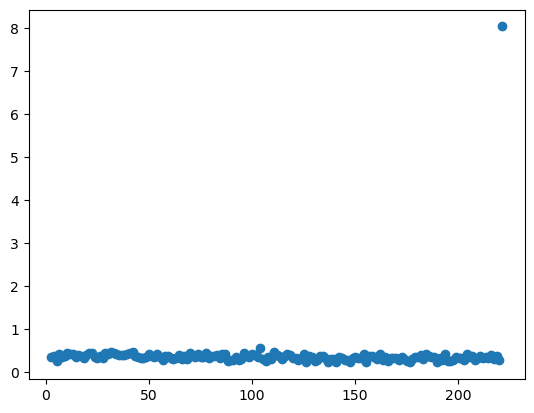

In [8]:
data=get_relative_intensity_df("0", "Ge72")
x = data["Time [Sec]"].astype(float)
y = data["Cu63"]
plt.scatter(x,y)

Le point très haut dans le graphique est un infini. Le programme le place ici à cause de la façon dont Python ajuste automatiquement les axes.<br> Pour obtenir des données exploitables, on enlève les "outliers", c'est à dire les valeurs suffisamment éloignées de la distribution des autres valeurs.

Ces outliers sont déterminés par rapport aux quartiles :<br>
$x$ est un outlier si $\begin{cases} x<Q_{1}-1,5(Q_{3}-Q_{1}) \\ x>Q_{3}+1,5(Q_{3}-Q_{1}) \end{cases}$.

Certaines valeurs d'erreurs et de RSD sont invalides, il s'agit de celles où l'intensité associée est nulle. Elles sont mis à zéro.

La fonction suivante est très importante, puisque toute l'exploitation des données se fera à partir d'elle.<br>
C'est pour cette raison que l'on calcule également l'erreur standard sur la valeur :
$$ ES=\frac{\sigma}{\sqrt{n-1}} $$

In [62]:
def get_clean_intensity_df(calibrant, calibre, etalon):
    data = get_relative_intensity_df(calibre, etalon)[["Time [Sec]", calibrant]]
    data["RSD"] = get_RSD_df(calibre, etalon)[calibrant]
    data["Erreur"] = data.RSD * data[calibrant] / np.sqrt(2)
    
    #Calcul des quartiles
    Q1 = data[calibrant].quantile(0.25)
    Q3 = data[calibrant].quantile(0.75)
    
    #Outliers
    outlier_max = Q3 + 1.5 * (Q3 - Q1)
    outlier_min = Q1 - 1.5 * (Q3 - Q1)
    
    #Suppression des outliers
    data.drop(index=[0, 167], inplace=True)
    data_clean = data[(data[calibrant] < outlier_max) & (data[calibrant] > outlier_min)]
    
    #Mise à zéro des RSD et erreurs pour les valeurs d'intensité nulles
    is_zero = data_clean[calibrant] == 0.0
    data_clean.loc[is_zero,["Erreur", "RSD"]] = 0
    
    return data_clean

In [63]:
calibre = calibres[0] # 0: 0, 1: 2,5 ppm, 2: 10 ppm, 3: 50 ppm, 4: 100 ppm, 5: 300 ppm
calibrant = calibrants[5] # 0: cuivre, 1: zinc, 2: platine, 3: cobalt, 4: nickel, 5: sélénium, 6: molybdène, 7: cadmium
etalon = etalons[0] #0: germanium, 1: rhodium, 2: tellure

print("Calibrant: "+calibrant)
print("Calibre: "+calibre)
print("Étalon: "+etalon)
get_clean_intensity_df(calibrant, calibre, etalon).head()


Calibrant: Se78
Calibre: 0
Étalon: Ge72


,Time [Sec],Se78,RSD,Erreur
1,2.646,0.000000,0.000000,0.000000
2,3.964,0.000000,0.000000,0.000000
3,5.282,0.000000,0.000000,0.000000
4,6.6,0.004237,1.732051,0.005189
5,7.918,0.004310,1.732051,0.005279


In [64]:
def get_intensity_plot(calibrant, calibre, etalon):
    data = get_clean_intensity_df(calibrant, calibre, etalon)
    
    x = data["Time [Sec]"].astype(float)
    y = data[calibrant]
    error = data["Erreur"]
    plt.errorbar(x, y, yerr=error, fmt="bo")
    plt.xlabel("Time (s)")
    plt.ylabel("Intensity")
    
    #Concentration des calibrants mineurs
    if calibrant in cal_mineurs:
        calibre = str(float(calibre)/5)
    plt.title("Calibrant: "+calibrant+", Etalon: "+etalon+" at "+calibre+" ppm")
    return

Calibrant: Se78


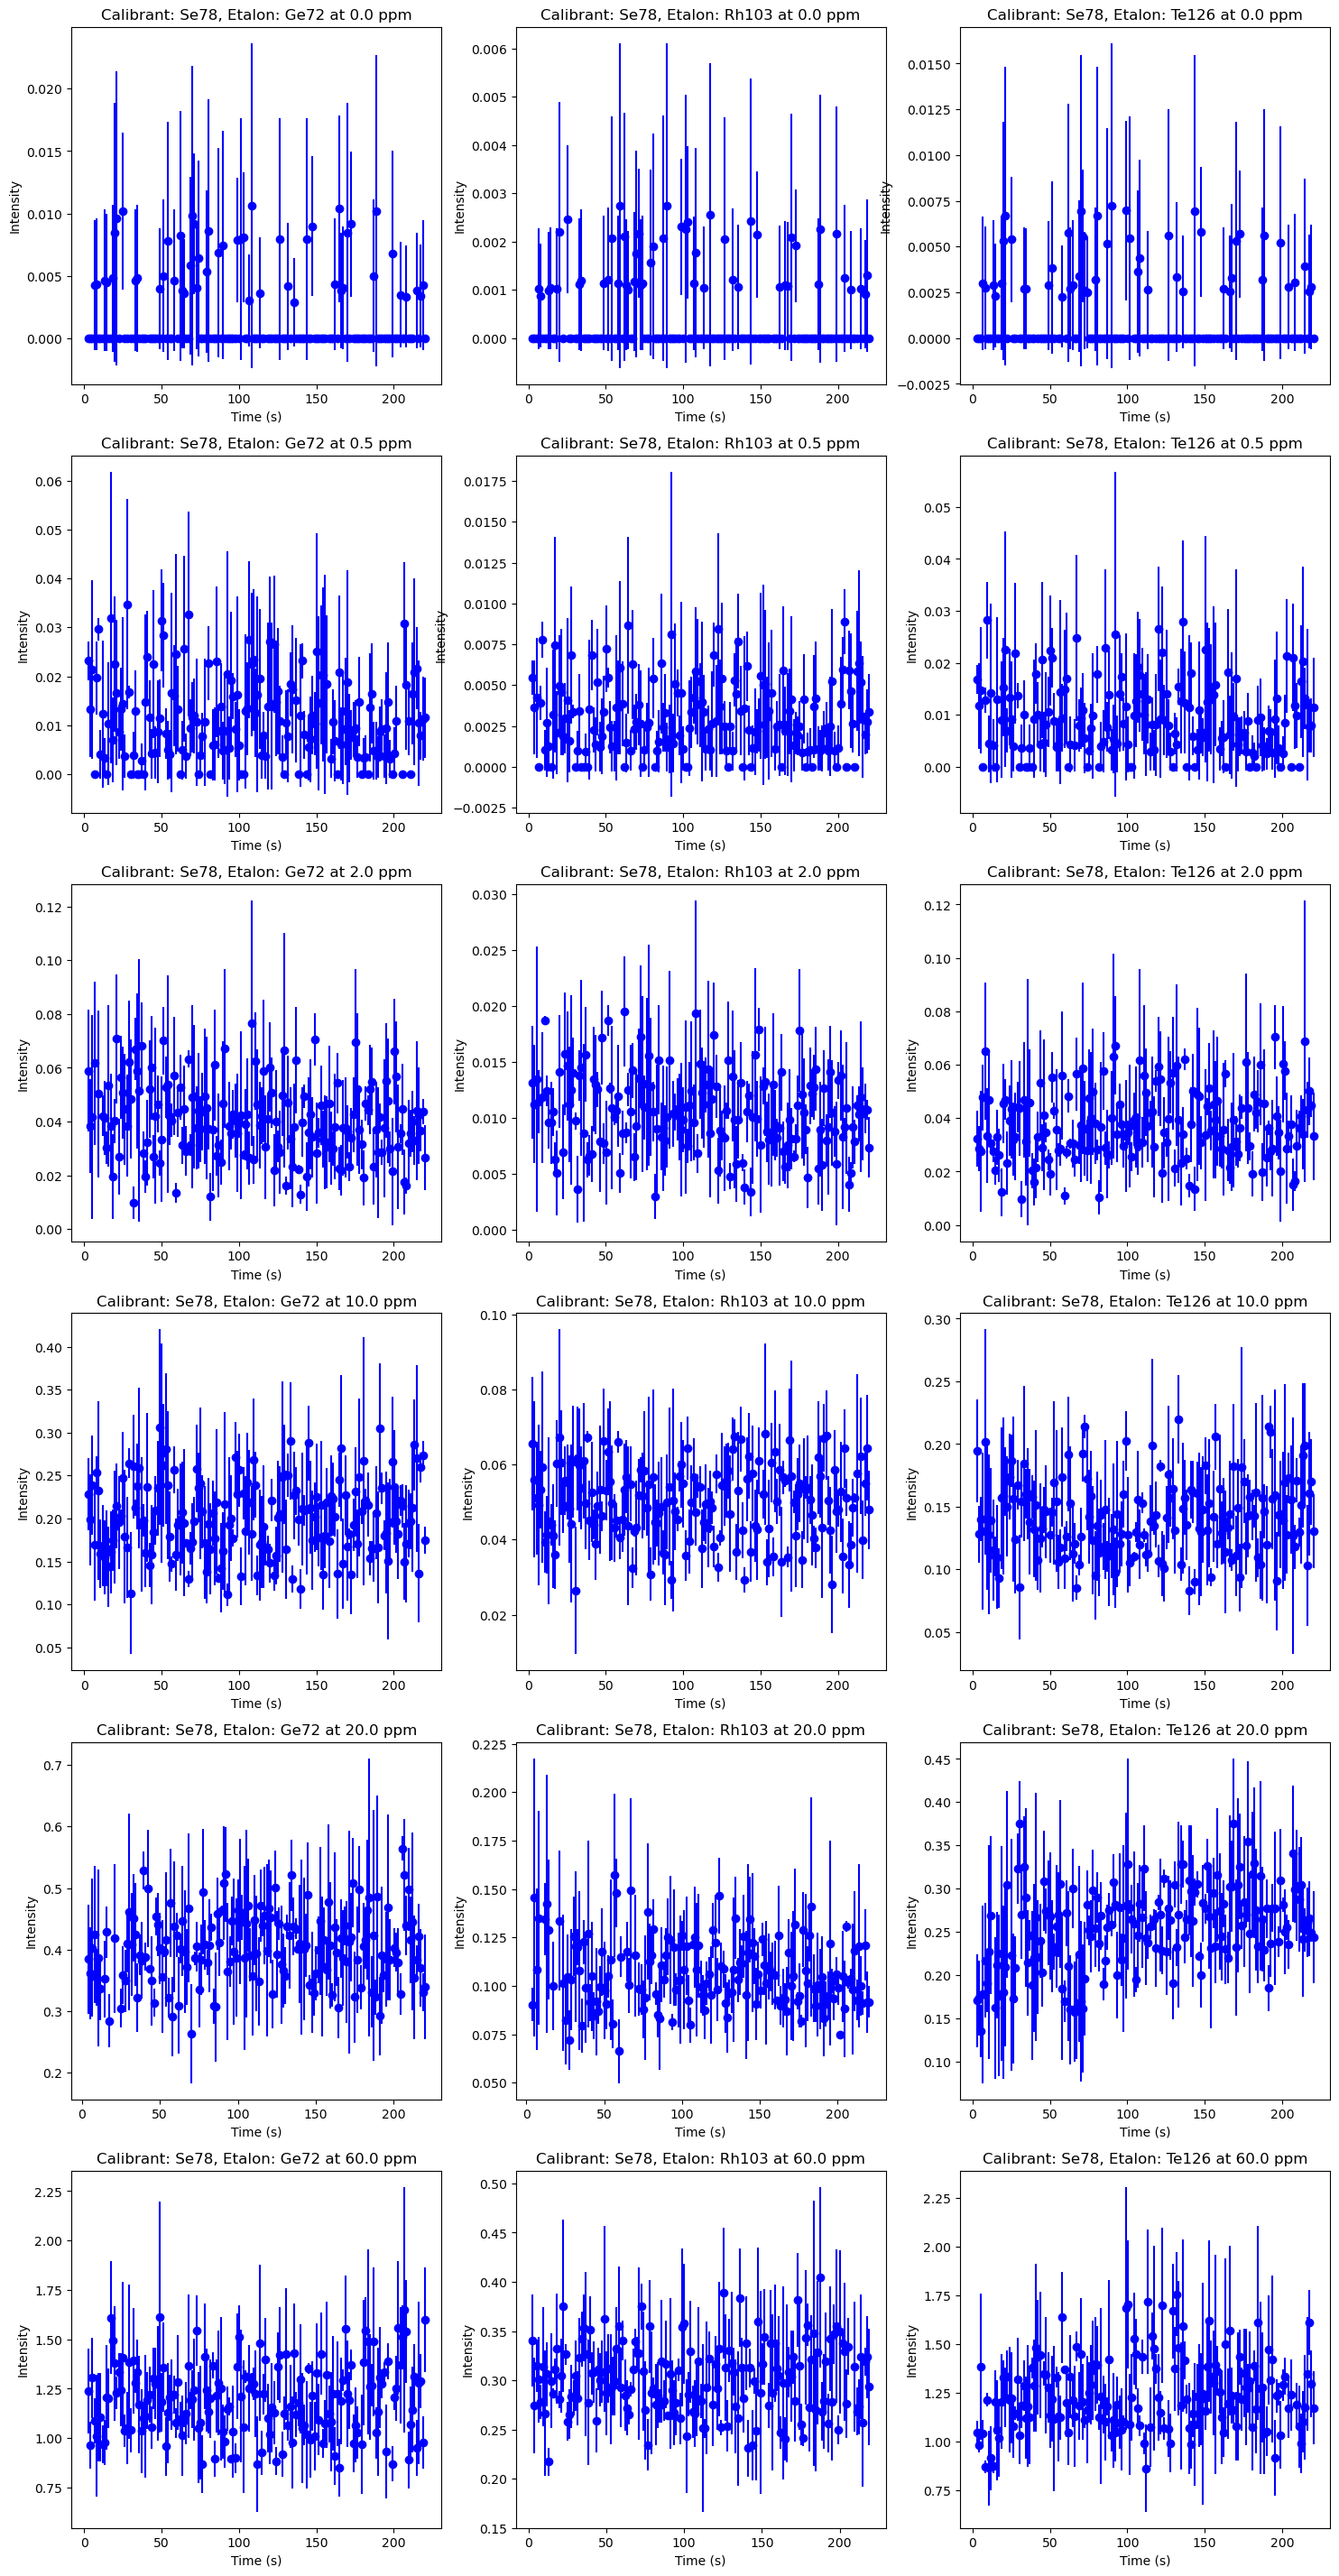

In [68]:
calibrant = calibrants[5] # 0: cuivre, 1: zinc, 2: platine, 3: cobalt, 4: nickel, 5: sélénium, 6: molybdène, 7: cadmium

print("Calibrant: "+calibrant)
plt.figure(figsize=(18, 6*6))
j = 1
for calibre in calibres:
    i = 1
    for etalon in etalons:
        plt.subplot(6,3,i+3*(j-1))
        get_intensity_plot(calibrant, calibre, etalon)
        i += 1
    j += 1

## Étalonnage

Le but étant de réaliser une régression linéaire, on crée pour cela une dataframe contenant l'intensité relative pour chaque concentration pour un calibrant et un étalon donnés.<br>
Les calibrants mineurs, à partir du cobalt, sont dits mineurs et ont une concentration cinq fois moindre.<br>
La fonction suivante calcule l'intensité relative moyenne pour le calibrant et l'étalon indiqués à partir de la dataframe créée à la fin de la partie précédente.

In [13]:
def get_average_intensity_calibrant_df(calibrant, etalon):
    for calibre in calibres:
        data = get_clean_intensity_df(calibrant, calibre, etalon)
        if calibre == calibres[0]:
            average = [data[calibrant].mean(axis=0)]
            std_dev = [data[calibrant].std(axis=0)] 
            error = [data["Erreur"].mean(axis=0)]
        else:
            average.append(data[calibrant].mean(axis=0))
            std_dev.append(data[calibrant].std(axis=0))
            error.append(data["Erreur"].mean(axis=0))
    average_df = pd.DataFrame({"Concentration": calibres, 
                               "Intensité": average, 
                               "Écart-type": std_dev,
                               "Erreur": error}
                         )
    #Les concentrations sont des chaînes de caractère : il faut les transformer en réels 
    average_df.Concentration = average_df.Concentration.astype(float)
    
    #Concentration des calibrants mineurs
    if calibrant in cal_mineurs:
        average_df.Concentration = average_df.Concentration * 1/5
    return average_df

In [14]:
calibrant = calibrants[3] # 0: cuivre, 1: zinc, 2: platine, 3: cobalt, 4: nickel, 5: sélénium, 6: molybdène, 7: cadmium
etalon = etalons[0] #0: germanium, 1: rhodium, 2: tellure

print("Calibrant: "+calibrant)
print("Étalon: "+etalon)
get_average_intensity_calibrant_df(calibrant, etalon)

Calibrant: Co59
Étalon: Ge72


,Concentration,Intensité,Écart-type,Erreur
0,0.0,0.183672,0.043111,0.060712
1,0.5,0.287716,0.051274,0.061070
2,2.0,0.446539,0.081434,0.084986
3,10.0,1.675580,0.205092,0.254050
4,20.0,2.972661,0.409452,0.456629
5,60.0,8.889144,1.159686,1.239900


Maintenant que nous avons une dataframe avec la concentration et l'intensité, nous pouvons effectuer la régression linéaire. Nous allons utiliser la méthode des moindres carrés. Malgré le fait qu'en théorie la fonction soit linéaire, le modèle résultant sera donc une fonction affine.<br>
Le modèle que l'on cherche a la forme $ \hat{C}=\hat{\beta_{0}}+\hat{\beta_{1}}I $.<br>
La pente $\hat{\beta_{1}}$ s'obtient à partir de la formule : $$ \hat{\beta_{1}} = \frac{Cov(I, C)}{Var(I)} $$ 
où $Cov(I, C)$ est la covariance de $I$ et $C$ : $$Cov(I, C)= \frac{1}{n-1}\sum (I-\bar{I})(C-\bar{C})$$
et $Var(I)$ est la variance de $I$ : $$Var(I)= \frac{1}{n-1}\sum (I-\bar{I})^{2}$$
L'ordonnée à l'origine s'obtient ensuite facilement par 
$$ \hat{\beta_{0}} = \bar{C}-\hat{\beta_{1}}\bar{I} $$

Pour évaluer la précision du modèle, on calcule également le $R^{2}$ :
$$R^{2} = 1 - \frac{\sum (C-\hat{C})^{2}}{\sum (C-\bar{C})^{2}}$$

Pour évaluer l'erreur, on utilise les formules permettant de calculer la variance des coefficients de régression :
$$ Var(\hat{\beta_{1}}) = \frac{\hat{\sigma}^{2}}{\sum (I-\bar{I})^{2}} $$
$\hat{\sigma}^{2}$ est la variance des valeurs estimées : $\hat{\sigma}^{2} = \frac{1}{n-2} \sum (C-\hat{C})^{2} $
$$ Var(\hat{\beta_{0}}) = \frac{1}{n} \frac{\hat{\sigma}^{2} \sum I^{2}}{\sum (I-\bar{I})^{2}} $$

La fonction suivante prend un calibrant et un étalon, et renvoie une liste contenant les paramètres du modèle de régression linéaire calculé à partir de ces données.

In [15]:
def linear_reg(calibrant, etalon):
    data = get_average_intensity_calibrant_df(calibrant, etalon)
    
    #Calcul de la pente
    covariance = np.cov(data["Intensité"], data["Concentration"])[0][1]
    variance = data["Intensité"].var()
    pente = covariance / variance
    
    #Calcul de l'origine
    origine = data["Concentration"].mean() - pente * data["Intensité"].mean()
    
    #Calcul du R²
    residual_sum_squares_y = ((data["Concentration"] - (data["Intensité"] * pente + origine))**2).sum()
    total_sum_squares_y = ((data["Concentration"] - data["Concentration"].mean(axis = 0))**2).sum()
    R2 = 1-residual_sum_squares_y/total_sum_squares_y
    
    #Calcul des erreurs standards
    var_y = residual_sum_squares_y * 1/4
    total_sum_squares_x = ((data["Intensité"] - data["Intensité"].mean(axis = 0))**2).sum()
    error_pente = np.sqrt(var_y/total_sum_squares_x)
    error_origine = np.sqrt((data["Intensité"] ** 2).sum() * (var_y/total_sum_squares_x) * 1/6)
    
    return [pente, origine, R2, error_pente, error_origine]

À partir de cette fonction, celle-ci renvoie à partir des mêmes paramètres la courbe d'étalonnage correspondante.

In [16]:
def draw_calibration_graph(calibrant, etalon):
    
    #Obtention des données
    data = get_average_intensity_calibrant_df(calibrant, etalon)
    x = data["Intensité"]
    y = data["Concentration"]
    n = get_clean_intensity_df(calibrant, "0", etalon)[calibrant].size
    
    #Obtention du modèle
    regression = linear_reg(calibrant, etalon)
    origine = np.round(regression[1], 1)
    pente = np.round(regression[0], 1)
    R2 = np.round(regression[2], 3).astype(str)
    
    #Calcul de l'erreur standard
    error_pente = np.round(regression[3], 1).astype(str)
    error_origine = np.round(regression[4], 1).astype(str)
    error = data["Écart-type"] / np.sqrt(n-1) + data["Erreur"]
    
    #Création du graphique et des points de données
    plt.errorbar(x, y, xerr=error, fmt="ro")
    
    #Création de la droite
    plt.plot(x, x * pente + origine, 
    label=etalon+": ("+origine.astype(str)+"±"+error_origine+") + ("+pente.astype(str)+"±"+error_pente+")C, R²="+R2)
             
    #Mise en forme
    plt.xlabel("Intensité")
    plt.ylabel("Concentration (ppm)")
    plt.title(calibrant)
    plt.legend()

La même fonction peut être appelée plusieurs fois pour afficher plusieurs modèles sur un seul graphique.<br>
Voici un exemple avec tous les calibrants et les trois courbes d'étalonnage par graphique.<br>
*Ce programme met plusieurs dizaines de secondes à s'éxécuter complètement.<br>
L'image est grande, pour activer/désactiver le défilement de la cellule, vous pouvez appuyer sur Maj+O.*

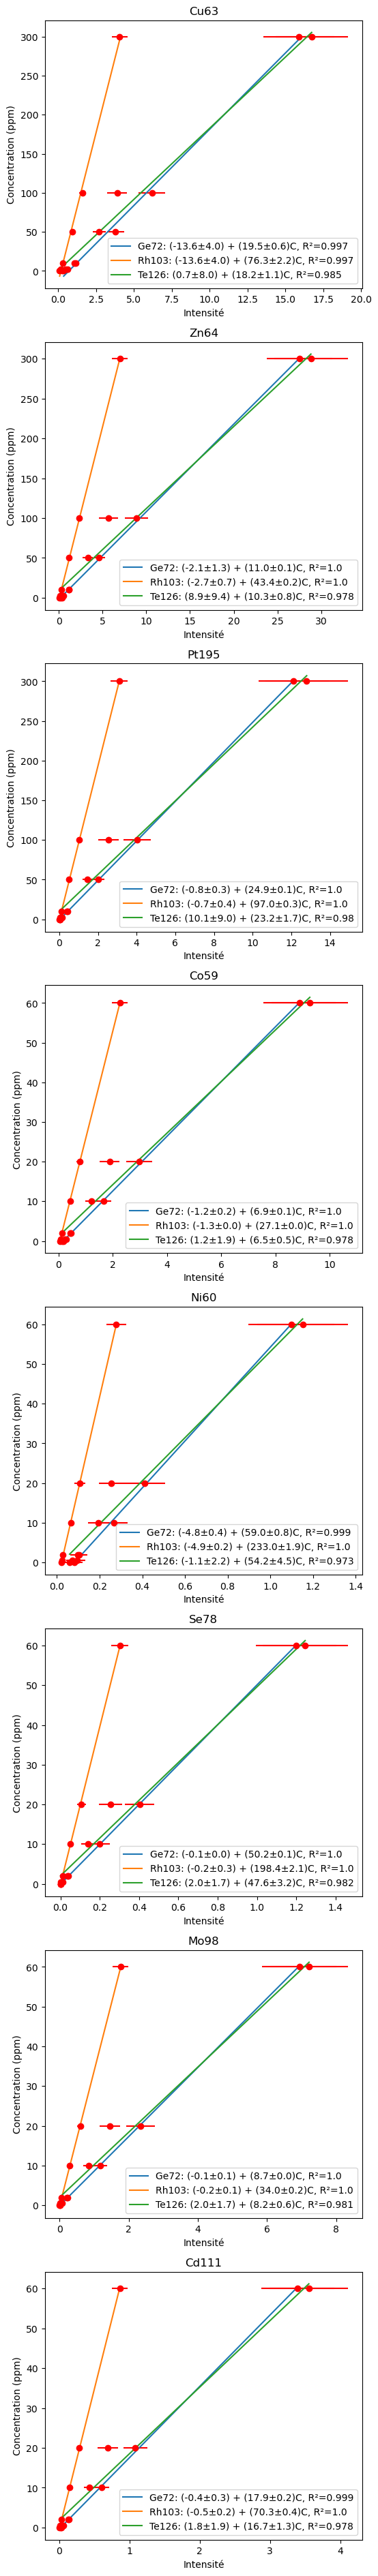

In [17]:
plt.figure(figsize=(6, 6*8))
i = 1
for calibrant in calibrants:
    plt.subplot(8,1,i)
    for etalon in etalons:
        draw_calibration_graph(calibrant, etalon)
    i += 1

## Utilisation du modèle

Nous allons appliquer ces modèles de régression linéaire à de vrais échantillons. L'échantillon donné en exemple est dans le sous-dossier image du fichier data téléchargé avec le notebook.

Tout d'abord, la fonction suivante est créée. Elle calcule la concentration à partir de l'intensité relative avec le modèle donné.

In [18]:
def get_concentration(intensity, calibrant, etalon):
    regression = linear_reg(calibrant, etalon)
    concentration = (regression[1]+regression[0]*intensity)
    erreur = (regression[4]+regression[3]*intensity)
    return [concentration, erreur]

In [19]:
calibrant = calibrants[0] # 0: cuivre, 1: zinc, 2: platine, 3: cobalt, 4: nickel, 5: sélénium, 6: molybdène, 7: cadmium
etalon = etalons[0] #0: germanium, 1: rhodium, 2: tellure

print("Calibrant: "+calibrant)
print("Étalon: "+etalon)
get_concentration(2,calibrant, etalon)

Calibrant: Cu63
Étalon: Ge72


[25.305773415374354, 5.165152611862492]

La machine parcoure l'échantillon ligne par ligne, en gardant le même écart entre les lignes. La fréquence d'échantillonage des données est constante.<br>
Chaque ligne de l'échantillon correspond à un fichier de données, qui sont numérotés. Les fichiers ont eux toujours le même nombre de lignes.<br>
Cela signifie que l'on peut créer une dataframe qui est une sorte d'image de l'échantillon. L'index est alors l'abscisse, le numéro de la colonne est l'ordonnée.

Matplotlib possède une fonction *imshow()*, qui permet de visualiser des données sous forme d'image 2D, avec l'axe z représenté par un spectre coloré, la *colorbar*. Nous allons nous servir de cette fonction pour créer deux représentations de l'échantillon, l'une avec l'intensité indiquée par la couleur, l'autre avec la concentration.<br>
On peut fixer les bornes de la *colorbar* avec les paramètres optionnels *vmin* et *vmax*, ce qui permet de masquer facilement les *outliers*.

In [20]:
def draw_image_intensity(nbr_lines, calibrant, etalon):
    
    #Création de la dataframe
    for line in range(1,nbr_lines+1):
        
        #Lecture du fichier de données et création d'une df temporaire
        df_temp = pd.read_csv("data/image/01-51T-OC-"+str(line)+".csv",
                    sep=",",
                    index_col=None,
                    skiprows=3
                    )
        #Ajout des données de la ligne à la dataframe
        new_column = pd.DataFrame({line: df_temp[calibrant].div(df_temp[etalon], axis=0)},
                                 index=df_temp.index
                                 )
        if line == 1:
            df = new_column.copy()
        else:
            df = pd.concat([df,new_column[line]], axis=1)
    
    #Nettoyage des données
    df.drop(index=[173,174,175], inplace=True)
    Q1 = df.quantile(0.25).mean()
    Q3 = df.quantile(0.75).mean()
    outlier_max = Q3 + 1.5 * (Q3-Q1)
    outlier_min = Q1 - 1.5 * (Q3-Q1)
    
    #Création de l'image
    x = [*range(0,173)]
    y = [*range(1,nbr_lines+1)]
    z = df.loc[x, y]
    
    plt.imshow(z, vmin=outlier_min, vmax=outlier_max, aspect="auto")
    plt.colorbar()
    plt.title(calibrant+" étalonné par rapport à "+etalon)

In [21]:
def draw_image_concentration(nbr_lines, calibrant, etalon):
    
    #Obtention du modèle
    regression = linear_reg(calibrant, etalon)
    
    #Création de la dataframe
    for line in range(1,nbr_lines+1):
        
        #Lecture du fichier de données et création d'une df temporaire
        df_temp = pd.read_csv("data/image/01-51T-OC-"+str(line)+".csv",
                    sep=",",
                    index_col=None,
                    skiprows=3
                    )
        
        #Ajout des données de la ligne à la dataframe
        new_column = pd.DataFrame({line: df_temp[calibrant]*regression[0]+regression[1]},
                                 index=df_temp.index
                                 )
        if line == 1:
            df = new_column.copy()
        else:
            df = pd.concat([df,new_column[line]], axis=1)
            
    #Nettoyage des données
    df.drop(index=[173,174,175], inplace=True)
    Q1 = df.quantile(0.25).mean()
    Q3 = df.quantile(0.75).mean()
    outlier_max = Q3 + 1.5 * (Q3-Q1)
    outlier_min = Q1 - 1.5 * (Q3-Q1)
    
    #Création de l'image
    x = [*range(0,173)]
    y = [*range(1,nbr_lines+1)]
    z = df.loc[x, y]
    
    plt.imshow(z, vmin=outlier_min, vmax=outlier_max, aspect="auto")
    plt.colorbar()
    plt.title(calibrant+" étalonné par rapport à "+etalon)

On fait ici une comparaison des images obtenues pour l'intensité (gauche) et la concentration (droite), pour chaque calibrant.<br>
Vous pouvez modifier l'étalon utilisé en modifiant le chiffre dans la première ligne.<br>
*Ce programme met plusieurs dizaines de secondes à s'éxécuter complètement.*

Étalon: Rh103


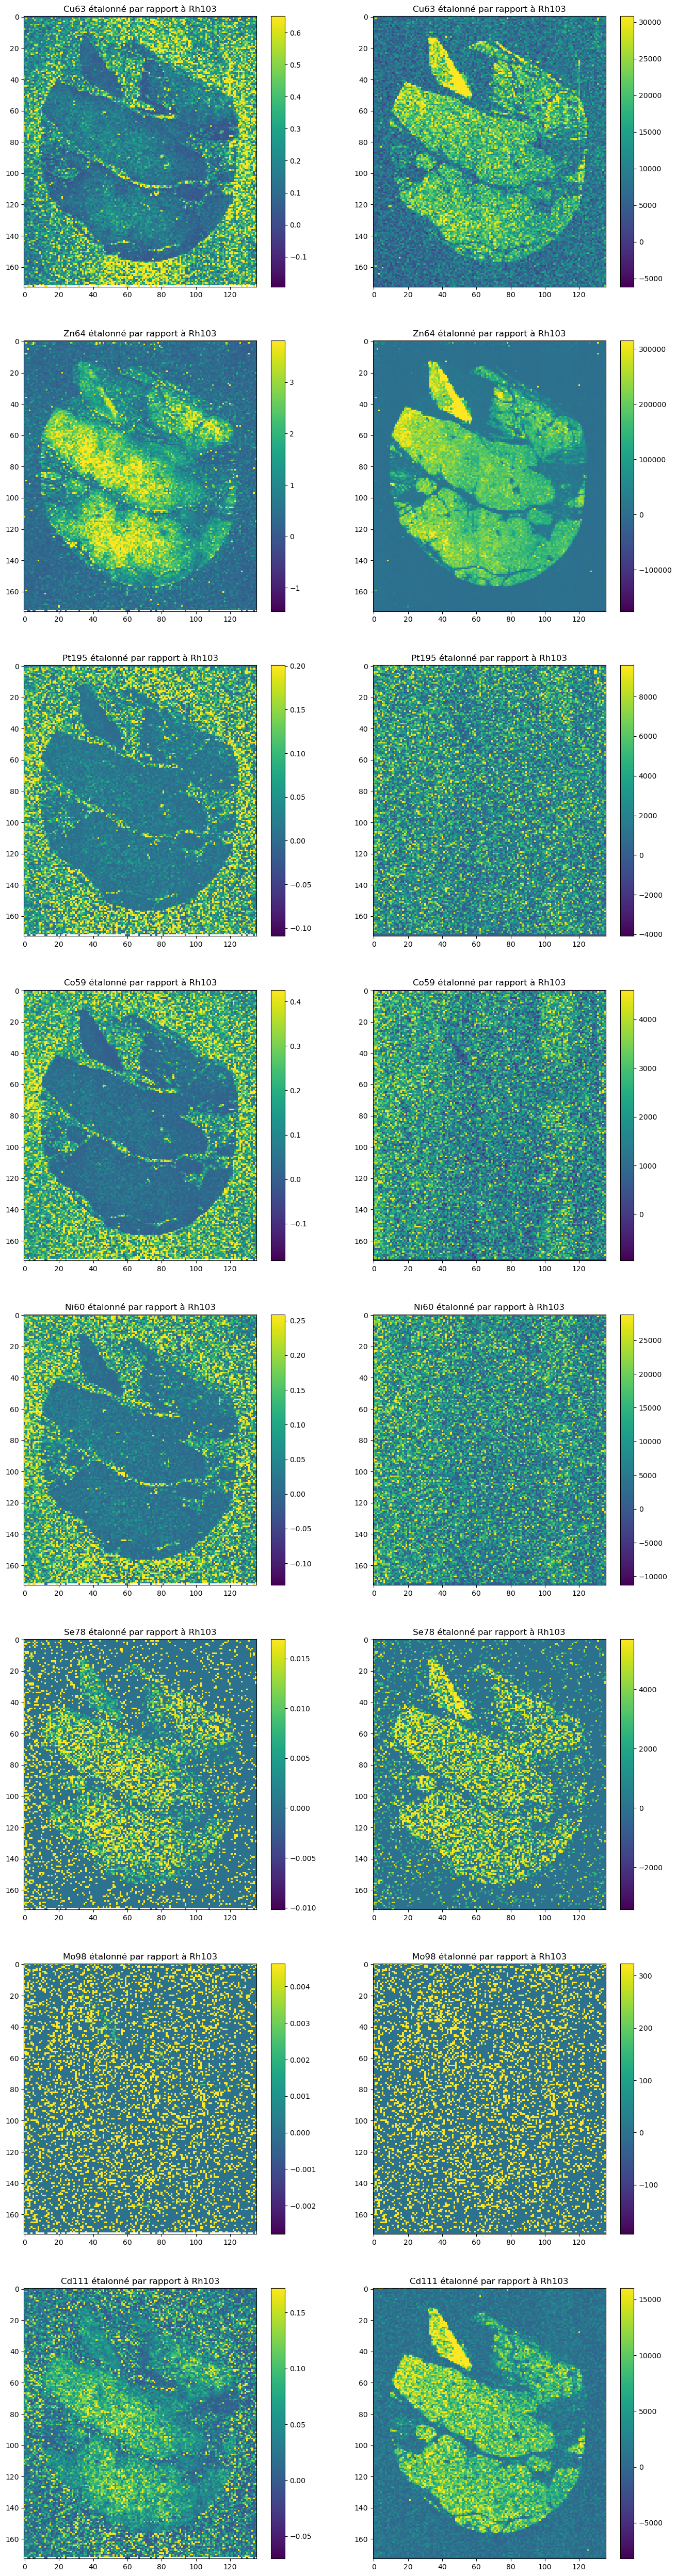

In [25]:
etalon = etalons[1] #0: germanium, 1: rhodium, 2: tellure

print("Étalon: "+etalon)
plt.figure(figsize=(8*2, 8*2*4))
j = 1
for calibrant in calibrants:
    plt.subplot(8,2,2*j-1)
    draw_image_intensity(136, calibrant, etalon)
    plt.subplot(8,2,2*j)
    draw_image_concentration(136, calibrant, etalon)
    j += 1

Le code suivant produit toutes les images en concentration pour chaque combinaison de calibrant (en ligne) et d'étalon (en colonne).<br>
*Ce programme met plusieurs dizaines de secondes à s'éxécuter complètement. Vous pouvez faire un clic droit sur l'image pour l'afficher dans un nouvel onglet.*

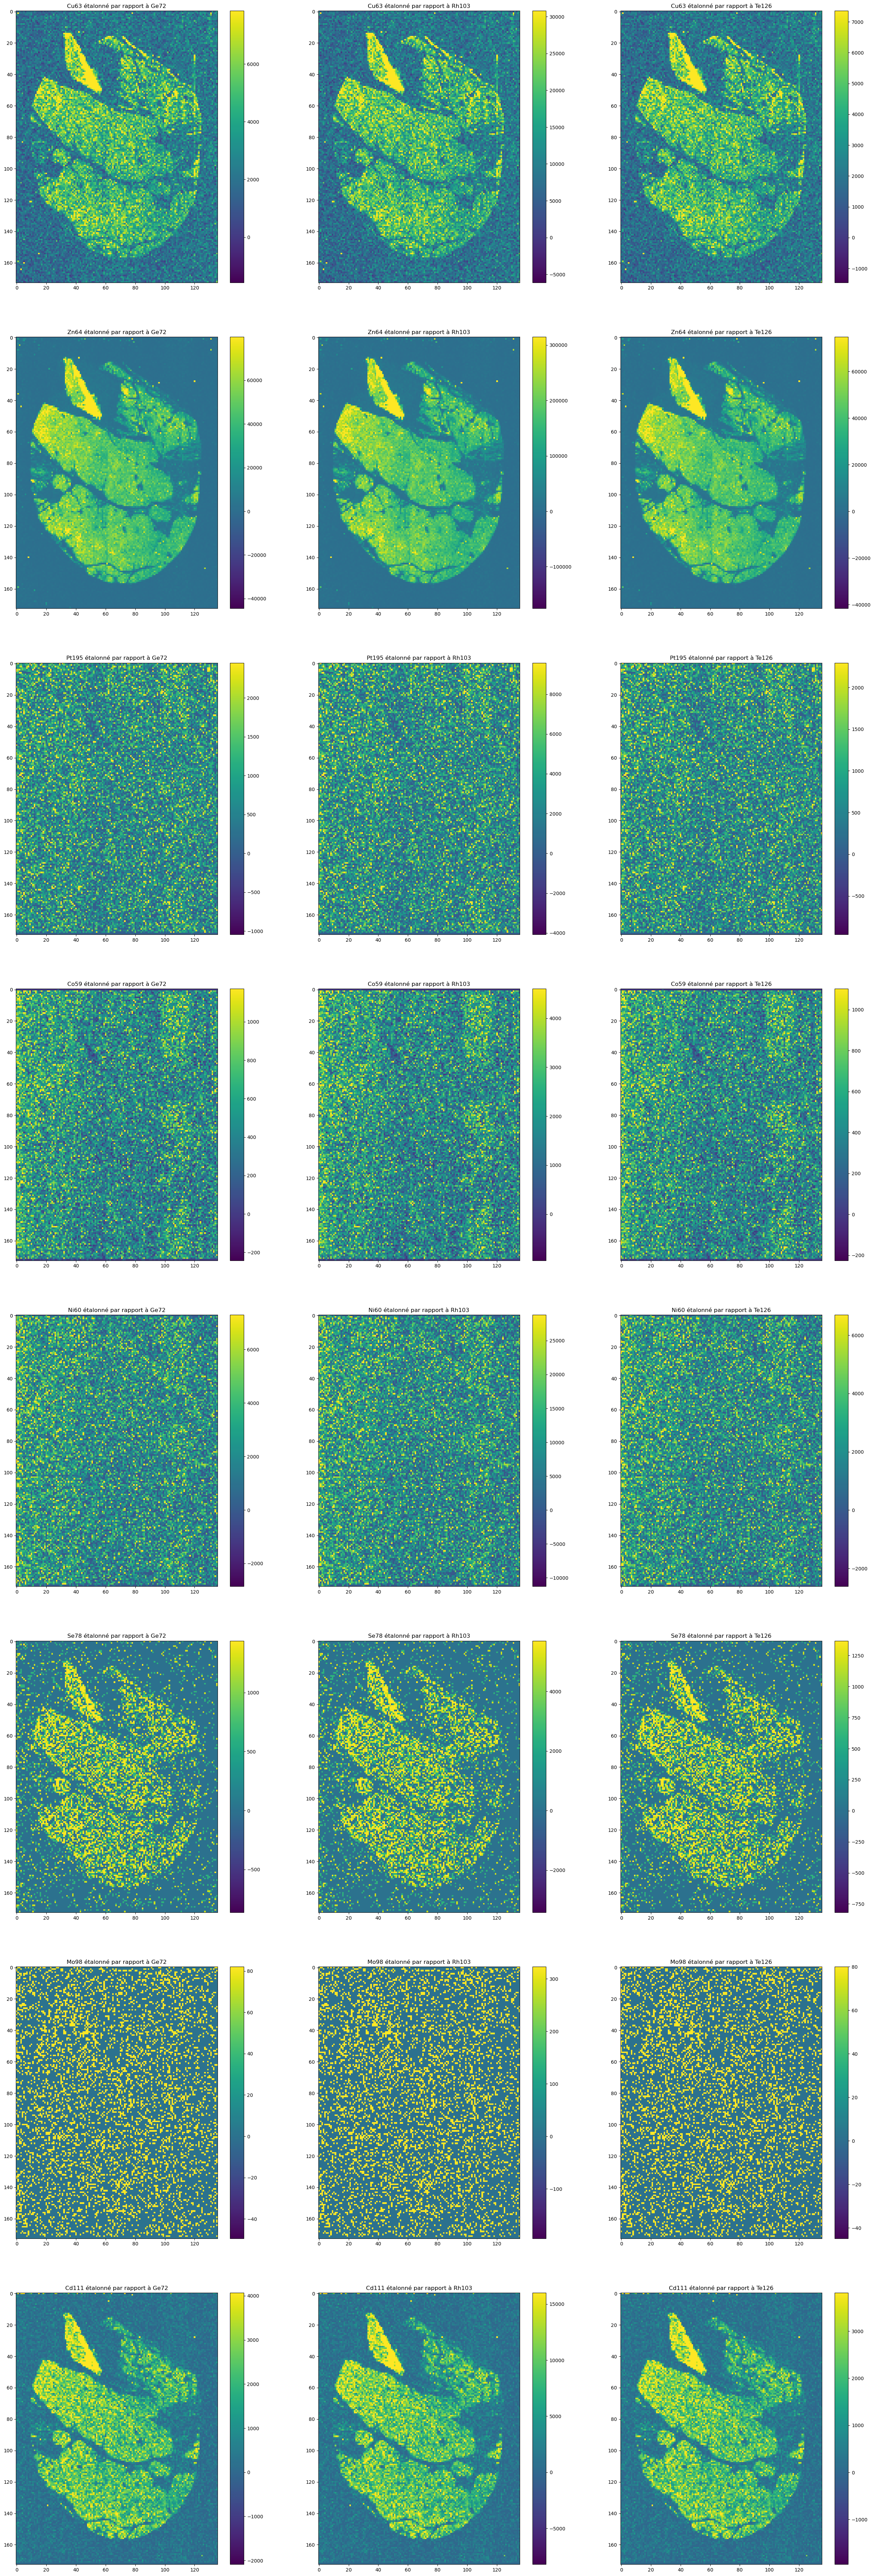

In [23]:
plt.figure(figsize=(8*4, 8*4*3))
j = 1
for calibrant in calibrants:
    i=1
    for etalon in etalons:
        plt.subplot(8,3,i+(j-1)*3)
        draw_image_concentration(136, calibrant, etalon)
        i += 1
    j += 1

## Conclusion

Nous avons réussi à effectuer un étalonnage pour chaque calibrant. Cet étalonnage nous a ensuite permi d'effectuer une mesure de la concentration en métaux d'un échantillon.

Plusieurs choses pourraient être améliorées : optimisation, obtenir les vrais dimensions pour les images, rendre le code plus modulable au format des données et gérer les mauvaises entrées de fonction.
Il serait également intéressant de réaliser un modèle avec une origine forcée à zéro, pour étudier les différences avec celui-ci.<br>